In [336]:
# Dependencies
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pylab as pl
import pandas as pd
import gmaps
import numpy as np
import requests
from citipy import citipy
from config import gkey

# Constants
resources_dir = "Resources"
images_dir = "Images"
data_file = "Stanford_MSA_Database.csv"
source = "https://library.stanford.edu/projects/mass-shootings-america"
citation = "Stanford Mass Shootings in America, courtesy of the Stanford Geospatial Center and Stanford Libraries"

In [254]:
df = pd.read_csv(f"{resources_dir}/{data_file}")
print(df.columns)
print(df.describe())
df.head()

Index(['CaseID', 'Title', 'Location', 'City', 'State', 'Latitude', 'Longitude',
       'Number of Civilian Fatalities', 'Number of Civilian Injured',
       'Number of Enforcement Fatalities', 'Number of Enforcement Injured',
       'Total Number of Fatalities', 'Total Number of Victims', 'Description',
       'Date', 'Day of Week', 'Date - Detailed', 'Shooter Name',
       'Number of shooters', 'Shooter Age(s)', 'Average Shooter Age',
       'Shooter Sex', 'Shooter Race', 'Type of Gun - Detailed',
       'Type of Gun - General', 'Number of Shotguns', 'Number of Rifles',
       'Number of Handguns', 'Total Number of Guns',
       'Number of Automatic Guns', 'Number of Semi-Automatic Guns',
       'Fate of Shooter at the scene', 'Fate of Shooter',
       'Shooter's Cause of Death', 'School Related', 'Place Type',
       'Relationship to Incident Location', 'Targeted Victim/s - Detailed',
       'Targeted Victim/s - General', 'Possible Motive - Detailed',
       'Possible Motive - Genera

,CaseID,Title,Location,City,State,Latitude,Longitude,Number of Civilian Fatalities,Number of Civilian Injured,Number of Enforcement Fatalities,...,Data Source 3,Data Source 4,Data Source 5,Data Source 6,Data Source 7,Military Experience,Class,Depreciation,Notes,Edit Date
0,1,University of Texas at Austin,"Austin, Texas",Austin,Texas,30.198887,-97.844159,15,32,1,...,http://news.google.com/newspapers?id=lkk0AAAAI...,http://news.google.com/newspapers?id=PPUjAAAAI...,http://books.google.com/books?id=ClYEAAAAMBAJ&...,NaN,NaN,Yes,SPK,1,NaN,6/8/2016
1,2,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5,1,0,...,http://www.nydailynews.com/news/crime/beauty-s...,http://books.google.com/books?id=Cre7qsswRiwC&...,NaN,NaN,NaN,Unknown,MS,1,NaN,6/8/2016
2,3,New Orleans Police Shootings,"New Orleans, Louisiana",New Orleans,Louisiana,30.068724,-89.931474,4,8,5,...,http://www.trutv.com/library/crime/notorious_m...,http://books.google.com/books?id=TfEDmROcZwEC&...,NaN,NaN,NaN,Unknown,SPK,1,NaN,6/22/2016
3,4,Clara Barton Elementary School,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,1,3,0,...,http://www.leagle.com/xmlResult.aspx?page=1&xm...,NaN,NaN,NaN,NaN,Unknown,MS,1,NaN,6/21/2016
4,5,Olean High School,"Olean, New York",Olean,New York,42.081854,-78.432139,3,7,0,...,http://www.newswithviews.com/Erica/Carle10.htm,http://books.google.com/books?id=ZuKoSskEWyIC&...,"""Olean High School Shooting"". Larrie Benton Za...",NaN,NaN,Unknown,MS,1,NaN,6/21/2016


In [255]:
gmaps.configure(api_key=gkey)
locations = df[["Latitude","Longitude"]].astype(float)
victims = df["Total Number of Victims"].astype(float)
max_victims = victims.max()
std_victims = victims.std()
print(max_victims)
print(std_victims)
fig_map = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=victims, 
                                 dissipating=False, max_intensity=(std_victims*3)**(0.5),
                                 point_radius = 1)
fig_map.add_layer(heat_layer)
fig_map

102.0
9.329268401390035


Figure(layout=FigureLayout(height='420px'))

In [256]:
df['Date'] = df['Date'].apply(pd.to_datetime)
df['Average Shooter Age'] = df['Average Shooter Age'].astype(float)
df['Civilian Fatalities'] = df['Number of Civilian Fatalities'].astype(int)
df['Civilian Injured'] = df['Number of Civilian Injured'].astype(int)
df['Enforcement Fatalities'] = df['Number of Enforcement Fatalities'].astype(int)
df['Enforcement Injured'] = df['Number of Enforcement Injured'].astype(int)
df['Fatalities'] = df['Civilian Fatalities'] + df['Enforcement Fatalities']
df['Injured'] = df['Civilian Injured'] + df['Enforcement Injured']
df['Victims'] = df['Fatalities'] + df['Injured']
df['Total Number of Victims'] =  df['Total Number of Victims'].astype(int)
df['Total Number of Fatalities'] = df['Total Number of Fatalities'].astype(int)
df['Number of shooters'] = df['Number of shooters'].astype(float)
df['% Fatal'] = df['Fatalities']/(df['Fatalities'] + df['Injured'])
df['Male Shooter'] = df['Shooter Sex'].apply(lambda x: 0 if x.find("Male") else 1)

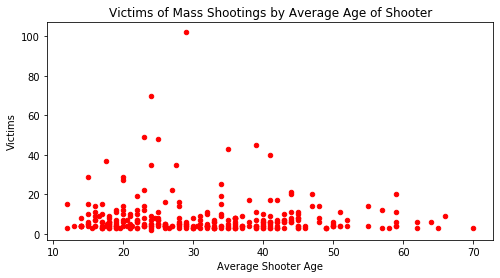

In [257]:
victims_by_shooter_age_fig = plt.figure(figsize=(8,4))
ax = victims_by_shooter_age_fig.add_subplot(111)
df.plot.scatter('Average Shooter Age',
                'Victims',color='red',
                title="Victims of Mass Shootings by Average Age of Shooter",
                ax=ax)
victims_by_shooter_age_fig.savefig(f"{images_dir}/VictimsByAge.png")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


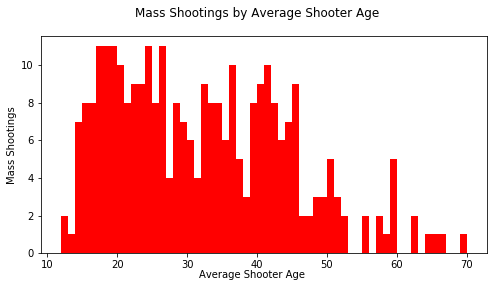

In [258]:
age_bins = int(df['Average Shooter Age'].max()-df['Average Shooter Age'].min())
age_fig, ax_age = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(8,4))
ax_age = pl.hist(df['Average Shooter Age'],bins=age_bins,color='red')
pl.suptitle('Mass Shootings by Average Shooter Age')
pl.ylabel('Mass Shootings')
age_fig.text(0.4,0.04,'Average Shooter Age')
age_fig.savefig(f"{images_dir}/AgeHist.png")

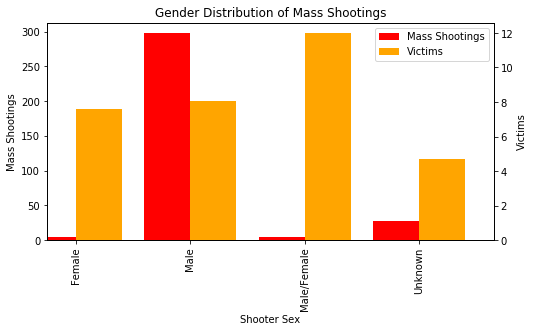

In [294]:
genderdf = df.groupby('Shooter Sex').agg({'CaseID':'count',
                                           'Victims':'mean'
                                          })
genderdf.rename(columns={'CaseID':'Mass Shootings'},inplace=True)
genderdf.head()
gender_fig = plt.figure(figsize=(8,4))
gender_ax1 = gender_fig.add_subplot(111)
gender_ax2 = gender_ax1.twinx()
genderdf["Mass Shootings"].plot.bar(color='Red',width=0.4,ax=gender_ax1,title="Gender Distribution of Mass Shootings",position=1)
genderdf["Victims"].plot.bar(color='Orange',width=0.4,ax=gender_ax2,secondary_y=True,position=0)
h1, l1 = gender_ax1.get_legend_handles_labels()
h2, l2 = gender_ax2.right_ax.get_legend_handles_labels()
gender_ax1.legend(h1+h2, l1+l2, loc=1)
gender_ax1.set_ylabel("Mass Shootings")
gender_ax2.right_ax.set_ylabel("Victims")
gender_fig.savefig(f"{images_dir}/ShooterSex.png")

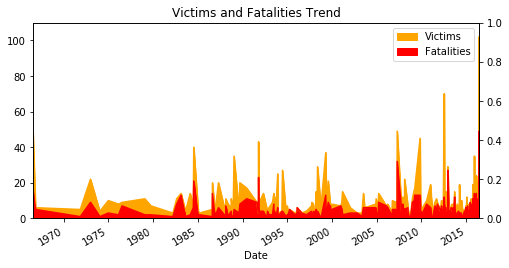

In [356]:
df['Date'] = df['Date'].apply(pd.to_datetime)
victims_df = df.groupby('Date').agg({'Victims':'sum','Fatalities':'sum'})
victims_df = victims_df.reset_index()
victims_df['Date'] = victims_df['Date'].apply(pd.to_datetime)
victims_fig = plt.figure(figsize=(8,4))
ax_victims = victims_fig.add_subplot(111)
ax_fatalities = ax_victims.twinx()
victims_df.plot.area(x='Date',y='Victims',color='orange',ax=ax_victims,title="Victims and Fatalities Trend")
victims_df.plot.area(x='Date',y='Fatalities',color='red',ax=ax_victims)
ax_victims.set_ylim(0,110)
#ticklabels = ['']*len(victims_df)
#spacing = 15
#ticklabels[::spacing] = [item.strftime('%m/%Y') for item in victims_df['Date'][::spacing]]
#ax_victims.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
victims_fig.savefig(f"{images_dir}/Victims.png")


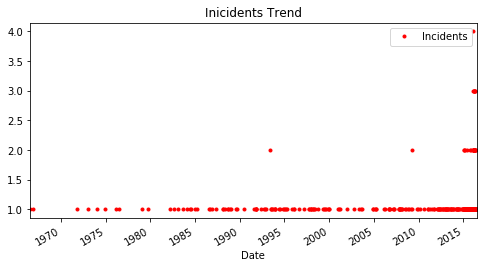

In [305]:
incidentsdf = df.groupby('Date').agg({'CaseID':'count'})
incidentsdf.rename(columns={'CaseID':'Incidents'},inplace=True)
incidence_fig = plt.figure(figsize=(8,4))
ax_incidence = incidence_fig.add_subplot(111)
incidentsdf.plot(color='red',style='.',title='Inicidents Trend',ax=ax_incidence)
incidence_fig.savefig(f"{images_dir}/Incidence.png")